Model Machine Learning untuk Data Time Series

> Sumber data: Kaggle


Title: World War 2 Weather History


In [ ]:
# install kaggle package
!pip install -q kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"heyitsmutee","key":"667512aa901b5745ff966a80ce852dc3"}'}

In [ ]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
# test kaggle dataset list
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-20 07:51:04           9594  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5834  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2157  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2464  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [66]:
!kaggle datasets download -d smid80/weatherww2

  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 54.0MB/s]


In [68]:
!mkdir world-war2-weather
!unzip /content/weatherww2.zip -d weatherww2
!ls world-war2-weather

mkdir: cannot create directory ‘world-war2-weather’: File exists
Archive:  /content/weatherww2.zip
  inflating: weatherww2/Summary of Weather.csv  
  inflating: weatherww2/Weather Station Locations.csv  


**Load Dataset**

In [69]:
import pandas as pd
df = pd.read_csv('/content/weatherww2/Summary of Weather.csv')
df.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,6,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,7,7,T,NaN,NaN,83.0,73.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,8,0.14,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,7,9,T,NaN,NaN,81.0,73.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,7,10,0.14,NaN,NaN,78.0,71.0,74.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.shape

(119040, 31)

In [71]:
df.info

<bound method DataFrame.info of           STA        Date Precip  WindGustSpd  ...  RHX  RHN  RVG WTE
0       10001    1942-7-1  1.016          NaN  ...  NaN  NaN  NaN NaN
1       10001    1942-7-2      0          NaN  ...  NaN  NaN  NaN NaN
2       10001    1942-7-3   2.54          NaN  ...  NaN  NaN  NaN NaN
3       10001    1942-7-4   2.54          NaN  ...  NaN  NaN  NaN NaN
4       10001    1942-7-5      0          NaN  ...  NaN  NaN  NaN NaN
...       ...         ...    ...          ...  ...  ...  ...  ...  ..
119035  82506  1945-12-27      0          NaN  ...  NaN  NaN  NaN NaN
119036  82506  1945-12-28  9.906          NaN  ...  NaN  NaN  NaN NaN
119037  82506  1945-12-29      0          NaN  ...  NaN  NaN  NaN NaN
119038  82506  1945-12-30      0          NaN  ...  NaN  NaN  NaN NaN
119039  82506  1945-12-31      0          NaN  ...  NaN  NaN  NaN NaN

[119040 rows x 31 columns]>

In [72]:
# null check
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [73]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].head()
df['MeanTemp'].fillna(df['MeanTemp'].mean(), inplace=True) # we will fill the null row
df = df[['Date','MeanTemp' ]]
df.head()

,Date,MeanTemp
0,1942-07-01,23.888889
1,1942-07-02,25.555556
2,1942-07-03,24.444444
3,1942-07-04,24.444444
4,1942-07-05,24.444444


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      119040 non-null  datetime64[ns]
 1   MeanTemp  119040 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 MB


In [76]:
ww2_weather=df[['Date','MeanTemp']].copy()
ww2_weather['just_date'] = ww2_weather['Date'].dt.date

ww2_weatherfinal=ww2_weather.drop('Date',axis=1)
ww2_weatherfinal.set_index('just_date', inplace= True)
ww2_weatherfinal.head()

,MeanTemp
just_date,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


In [77]:
ww2_weatherfinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119040 entries, 1942-07-01 to 1945-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MeanTemp  119040 non-null  float64
dtypes: float64(1)
memory usage: 1.8+ MB


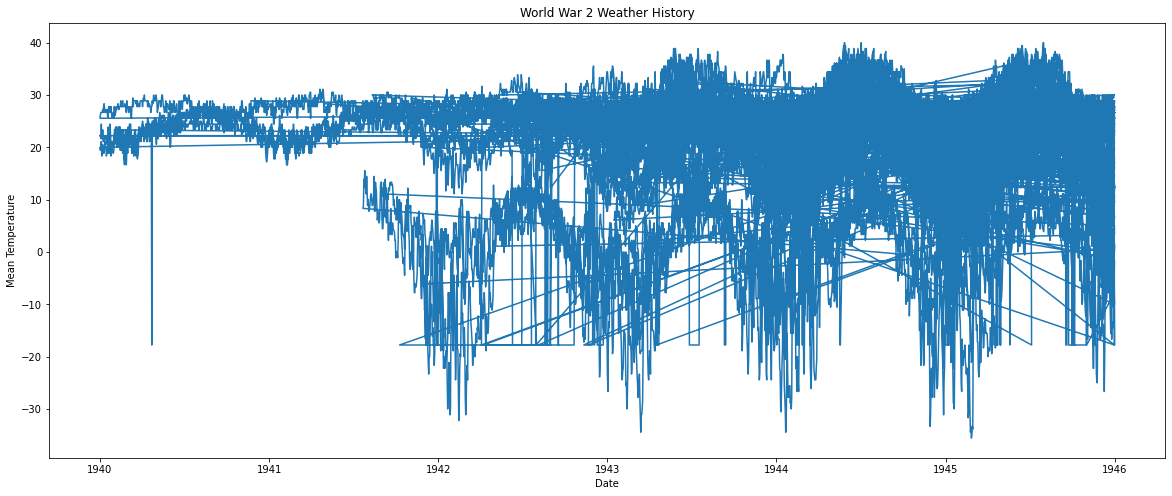

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(ww2_weatherfinal)
plt.title('World War 2 Weather History')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()

In [81]:
# get data values
date = df['Date'].values
temp = df['MeanTemp'].values

In [82]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

95232 23808


In [84]:
# model
from keras.layers import Dense, LSTM

data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [85]:
max = df['MeanTemp'].max()
print('Max value : ' )
print(max)

Max value : 
40.0


In [86]:
min = df['MeanTemp'].min()
print('Min value : ' )
print(min)

Min value : 
-35.55555556


In [93]:
x = (90.0 + 35.55555556) * (10 / 100)
print(x)

12.555555556000002


In [94]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [100]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train,
                    epochs=10,steps_per_epoch=50,
                    validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/10
50/50 [==============================] - 17s 325ms/step - loss: 2.5220 - mae: 2.9511 - val_loss: 3.0782 - val_mae: 3.5227

MAE of the model < 10% of data scale
